# Análisis data set "Ratings_baby" de Amazon

Fuente: http://jmcauley.ucsd.edu/data/amazon/

### Introducción
El análisis se va a realizar con 2 datasets:
1. ratings_Baby: Contiene el consolidado de las comprar y la calificación
2. Baby_5.json: Contiene la descripción del cliente que lo compró

In [2]:
# Importación de las librerias
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#import sys
import matplotlib.pyplot as plt

In [3]:
# Se importa el primer dataset y se le asignan las cabeceras para poder identificarlos después
#df_csv=pd.read_csv('ratings_Baby.csv', header=None)
df_csv=pd.read_csv('ratings_Baby.csv', names=['reviewerID','asin','overall','unixReviewTime'])

# Se importa el segundo dataset que se encuentra en formato json
df_json = pd.read_json("Baby_5.json", lines = True)

In [4]:
# Se imprime el primer dataset importado
df_csv

,reviewerID,asin,overall,unixReviewTime
0,A28O3NP6WR5517,0188399313,5.0,1369612800
1,AX0M1Z6ZWO52J,0188399399,5.0,1365465600
2,A1KD7N84L7NIUT,0188399518,4.0,1392336000
3,A29CUDEIF4X1UO,0188399518,3.0,1373241600
4,A32592TYN6C9EM,0316967297,4.0,1378425600
5,AA9X14MODL8XJ,0316967297,5.0,1363910400
6,AHAWBFF74JFGM,0615447279,5.0,1331078400
7,A3N6R7ONCCY2D,0615447279,5.0,1366675200
8,A1Y9UZAZHG0P5A,0615447279,5.0,1353888000
9,ATTTLHRK3VOOL,0615447279,2.0,1375401600


In [5]:
# Se imprime el segundo dataset importado
df_json

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,1373932800
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,1372464000
2,097293751X,"[0, 0]",5,Helps me know exactly how my babies day has go...,"03 19, 2014",A2LL1TGG90977E,Carter,Grandmother watching baby,1395187200
3,097293751X,"[0, 0]",5,I bought this a few times for my older son and...,"08 17, 2013",A5G19RYX8599E,cfpurplerose,repeat buyer,1376697600
4,097293751X,"[0, 0]",4,I wanted an alternative to printing out daily ...,"04 1, 2014",A2496A4EWMLQ7,C. Jeter,Great,1396310400
5,097293751X,"[0, 0]",4,"This is great for basics, but I wish the space...","05 10, 2014",A3OQEVD4C7G3L3,CMB,"Great for basics, but not detail",1399680000
6,097293751X,"[0, 0]",5,My 3 month old son spend half of his days with...,"07 17, 2013",ATZDT4B1U7NL,HYM,Perfect for the working mom,1374019200
7,097293751X,"[3, 3]",5,This book is perfect! I'm a first time new mo...,"01 27, 2013",A3NMPMELAZC8ZY,Jakell,Great for newborns,1359244800
8,097293751X,"[0, 0]",3,"I wanted to love this, but it was pretty expen...","04 22, 2014",A1ZSTU6RKY1JCL,Jen,"It's ok, but I liked a regular weekly planner ...",1398124800
9,097293751X,"[0, 0]",5,The Baby Tracker brand books are the absolute ...,"11 19, 2013",A1TFH58BMFJCR3,killerbee,Best for Tracking!,1384819200


In [6]:
# Se filtra para usar exclusivamente clientes identificados en la bd
df_grp = pd.merge(df_csv, df_json, how='inner', on=['reviewerID','asin','unixReviewTime','overall'])#.set_index(["reviewerID","asin","unixReviewTime"])
df_grp.to_csv('df_grp.txt',sep='®', index=False, header=True)
#df_grp

# Archivo con la fecha correcta y filtrado desde el 2010
df_csv_n=pd.read_csv('grupo_des.csv', names=['reviewerID','asin','overall','unixReviewTime','helpful','reviewText','reviewTime','reviewerName','summary'])
#df_csv_n


# Agregada por Cris
#df = df_grp.pivot(index='reviewerName', columns='asin', values='overall')
#df

In [7]:
# Total usuarios sin duplicados
usu_ori= len(df_grp.groupby(['reviewerName']).size().sort_values(ascending=False)) -1
usu_mod= len(df_csv_n.groupby(['reviewerName']).size().sort_values(ascending=False)) -1
# Total productos sin duplicados
pro_ori= len(df_grp.groupby(['asin']).size().sort_values(ascending=False)) 
pro_mod= len(df_csv_n.groupby(['asin']).size().sort_values(ascending=False)) 

print("Cantidad productos doc original: ",pro_ori)
print("Cantidad productos doc modificado: ",pro_mod)
print("\nCantidad usuarios doc original: ",usu_ori)
print("Cantidad usuarios doc modificado: ",usu_mod)

Cantidad productos doc original:  7050
Cantidad productos doc modificado:  6880

Cantidad usuarios doc original:  17176
Cantidad usuarios doc modificado:  16511


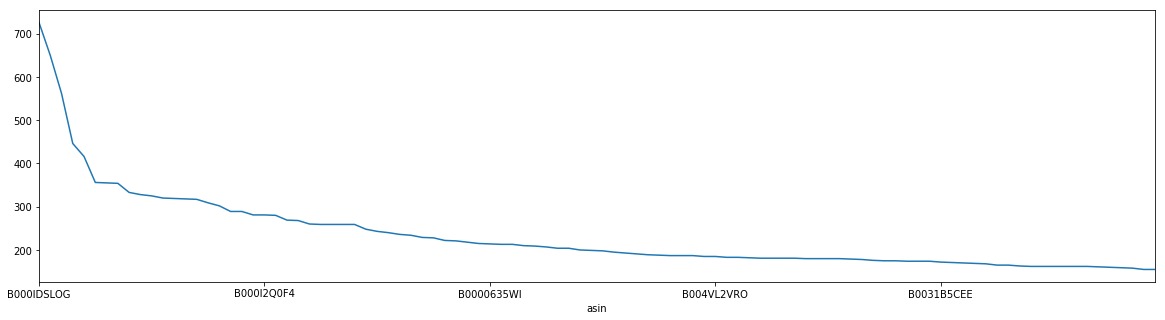

asin
B000IDSLOG    726
B00295MQLU    650
B000YDDF6O    562
B001U9OUYC    446
B0000DEW8N    416
B0042D69WY    356
B000LXQVA4    355
B000LSL5ZK    354
B001DVRTEA    333
B000GJIE4E    328
B001WAJVZM    325
B0045I6IA4    320
B0013FGWD0    319
B001AG0YL8    318
B0034UGFB6    317
B000S9RF4M    309
B0012AII9M    302
B0052QYLUM    289
B000BNQC58    289
B003AJXY10    281
B000I2Q0F4    281
B006ZVV0NO    280
B002MN3JY2    269
B002QYW8LW    268
B001UF8BL4    260
B001BMWABI    259
B006SFUEF2    259
B0038JDVBK    259
B000K53UEI    259
B002US8D5Y    248
             ... 
B00020L78M    180
B003U6HCGQ    180
B004W93MFK    179
B0067GKGFU    178
B004G8QSYO    176
B001I481LM    175
B000GB0NZK    175
B004L2JJAK    174
B00078ZHPS    174
B000GK5XY2    174
B0031B5CEE    172
B001GQ2SA2    171
B005OI8O88    170
B0016KV73W    169
B0045VA3SO    168
B0007CS4EU    165
B003AJHDQW    165
B00834D5SO    163
B003807VGK    162
B001KZH692    162
B003FPQKYW    162
B001O9F6M8    162
B000GOUUR8    162
B000CP2X9O    162
B001Q

In [72]:
# Top Productos del más votado al menos votado
#prod_most_voted=df_grp.groupby(['asin']).size().sort_values(ascending=False)#.head(150)
prod_most_voted=df_csv_n.groupby(['asin']).size().sort_values(ascending=False).head(100)
prod_most_voted.to_csv('prod_most_voted.txt',sep=' ', index=True, header=False)
prod_most_voted.plot(legend=False, figsize=(20,5))
plt.show()
prod_most_voted
### validar si el más calificado es el mejor votado

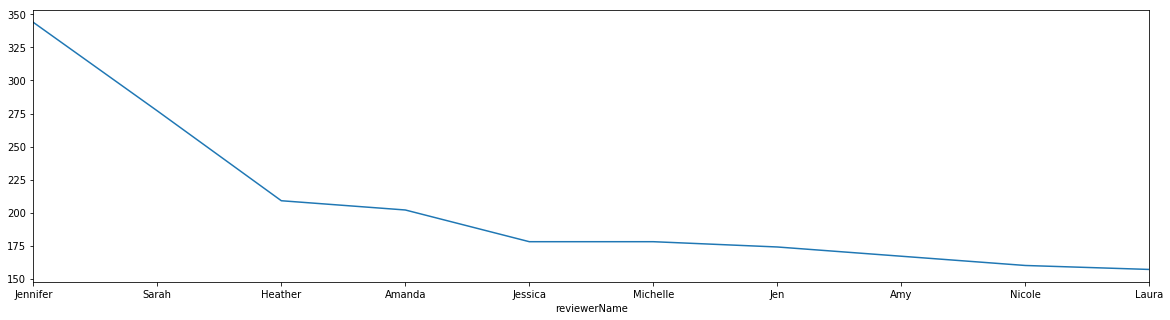

reviewerName
Jennifer    344
Sarah       277
Heather     209
Amanda      202
Jessica     178
Michelle    178
Jen         174
Amy         167
Nicole      160
Laura       157
dtype: int64

In [68]:
# Top Usuarios que más votan - limpiado
#user_most_votation_or=df_grp.groupby(['reviewerName']).size().sort_values(ascending=False).head(10)
user_most_votation=df_csv_n.groupby(['reviewerName']).size().sort_values(ascending=False).head(11)
user_most_votation.to_csv('user_most_votation.txt',sep=' ', index=True, header=False)
user_most_votation.drop(user_most_votation.index[0], inplace=True)
user_most_votation.plot(legend=False, figsize=(20,5))
plt.show()
user_most_votation
## Validar que tipo de calificación tiene el que más vota

In [10]:
# Filtro por producto
#df_grp.query('asin == \'B000IDSLOG\'')

In [11]:
# Filtro por usuario
#df_grp.query('reviewerName == \'Jennifer\'')

Fecha mínima:  2010-01-01
Fecha máxima:  2014-07-22


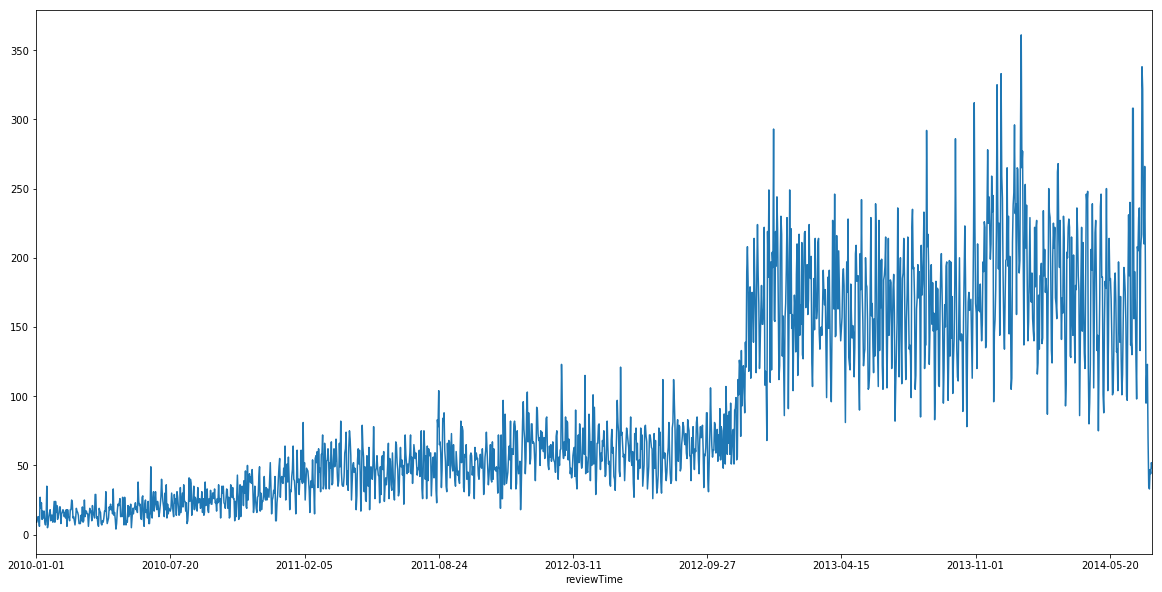

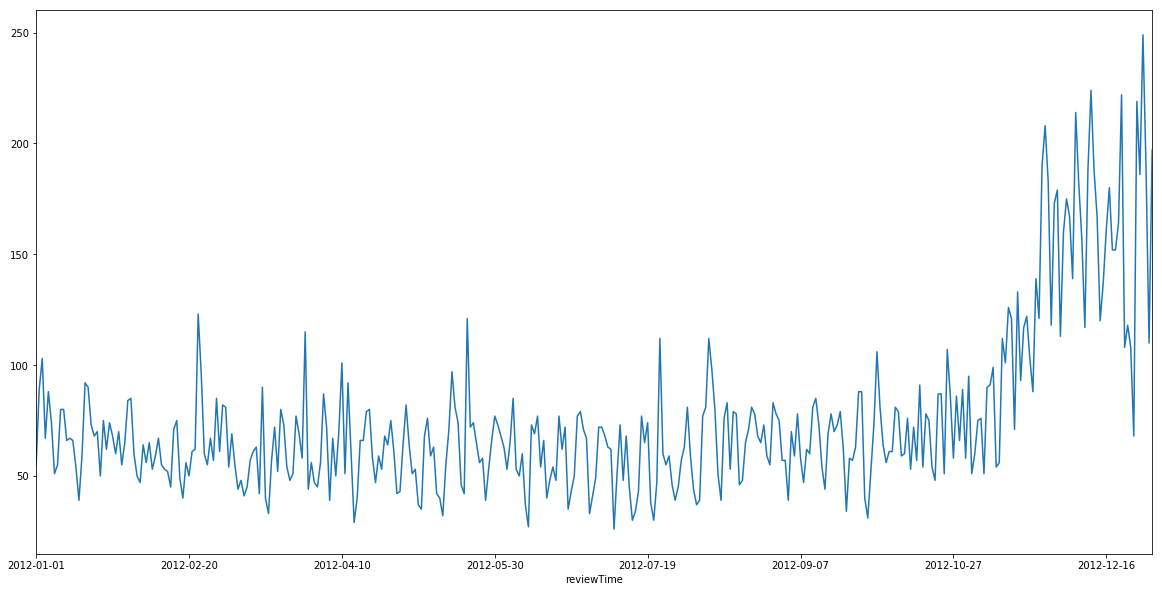

In [57]:
df_csv_n.drop(df_csv_n.index[0], inplace=True)
print("Fecha mínima: ",min(df_csv_n.reviewTime))
print("Fecha máxima: ",max(df_csv_n.reviewTime))
df_csv_n.groupby(['reviewTime']).size().sort_index().plot(legend=False, figsize=(20,10))
#df_csv_n.groupby(['reviewTime']).size().sort_values(ascending=False)#.head(150)
plt.show()

df_csv_n.groupby(['reviewTime']).size().sort_index().filter(like='2012', axis=0).plot(legend=False, figsize=(20,10))
plt.show()

In [58]:
matriz_calificaciones_productos=pd.read_csv('matriz_calificaciones_productos.csv', names=['1','2','3','4','5'], )
matriz_calificaciones_productos.drop(matriz_calificaciones_productos.head(1).index, inplace=True)
matriz_calificaciones_productos
### Sacar promedio ponderado
### (valor celda x estrella) -> se suma la fila de estos productos y se divide por la suma de la fila (sin productos)


,1,2,3,4,5
B003XMWFB4,2,3,2,1,1
B003Y53YR4,2,2,4,3,3
B003YC0W7W,1,3,2,3,4
B003YC0W8G,1,1,3,3,4
B003YDWU2Q,2,2,3,4,5
B003YHUVH8,3,1,2,1,2
B003YNL6M6,1,2,1,3,4
B003YV3S1A,1,2,2,1,1
B003YVHXAW,2,2,2,4,4
B003ZFPRHS,4,2,4,3,4


In [59]:
matriz_calificaciones_usuarios=pd.read_csv('matriz_calificaciones_usuarios.csv', names=['1','2','3','4','5'])
matriz_calificaciones_usuarios.drop(matriz_calificaciones_usuarios.head(1).index, inplace=True)
matriz_calificaciones_usuarios
### Sacar promedio ponderado
### (valor celda x estrella) -> se suma la fila de estos productos y se divide por la suma de la fila (sin productos)

,1,2,3,4,5
"Paige ""Paige In A Book""",1,1,1,1,2
"Penelope ""internet shoppy""",1,1,1,1,2
"Primatebuddy ""hcmitche""",1,1,2,1,1
"Private ""private31""",3,1,2,1,3
"R. D. Williams ""RDavidW""",1,1,2,1,2
"R. Ocampo ""Artisan""",1,2,3,3,1
"Rachel H ""Bon Vivant""",3,3,1,1,3
"Rachel McCulloch ""Mom, Wife, Blogger, World T...\t1\t1\t1\t2\t3\r\nRoberta T. Clemens """"sfgrl""""""",1,3,1,2,2
"Rolling Root ""Rolling Root""",1,1,1,1,1
"S. Day ""LoveinLight""",1,1,1,1,2


In [60]:
matriz='matriz_final_usu_prod.csv'
matriz_usuarios_productos=pd.read_csv(matriz)#, names=['I','II','III','IV','V'])
matriz_usuarios_productos.set_index('reviewerName', inplace=True)
matriz_usuarios_productos

,B000056J7K,097293751X,B000056J78,B00005U8T5,9729375011,B000058DN6
reviewerName,,,,,,
"A. Clapprood ""Alex""",5.0,NaN,NaN,NaN,NaN,NaN
"A. Hua ""Engineer and Psychologist - Tech and ...\t5.0\tNULL\tNULL\tNULL\tNULL\tNULL\r\nA. John """"military mom""""""",5.0,NaN,NaN,NaN,NaN,NaN
"Amanda Johnsen ""Amanda E. Johnsen""",NaN,5.0,NaN,NaN,NaN,NaN
"MidwestMommy ""Vicky""",NaN,NaN,5.0,NaN,NaN,NaN
"R. Davidson ""Jrdpa""",NaN,3.0,NaN,NaN,NaN,NaN
"Ronindoc ""Ronindoc""",NaN,NaN,NaN,5.0,NaN,NaN
"S. Pedersen ""Book, Bath & Bed.. wind me down!""",NaN,NaN,NaN,5.0,NaN,NaN
"SafeT ""Troy""",NaN,NaN,NaN,4.0,NaN,NaN
AJH,5.0,NaN,NaN,NaN,NaN,NaN
